In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [25]:
# 1. Load the dataset
df = pd.read_csv('Dataset\heart_disease_uci.csv')

In [8]:
# 2. Display the first and last 5 rows
print("First 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())

First 5 rows:
    id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal 

In [9]:
# 3. Display the number of rows and columns
print("\nShape of data (rows, columns):", df.shape)


Shape of data (rows, columns): (920, 16)


In [10]:
# 4. Display the number of categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns
print("\nNumber of categorical columns:", len(cat_cols))
print("Number of numerical columns:", len(num_cols))


Number of categorical columns: 8
Number of numerical columns: 8


In [27]:
# 5. For numerical columns, display min, max, and mode
print("\nNumerical columns' Min, Max, Mode:")
print(df[num_cols].agg(['min', 'max',lambda x: x.mode().iloc[0]]))


Numerical columns' Min, Max, Mode:
           id  age  trestbps   chol  thalch  oldpeak   ca  num
min         1   28       0.0    0.0    60.0     -2.6  0.0    0
max       920   77     200.0  603.0   202.0      6.2  3.0    4
<lambda>    1   54     120.0    0.0   150.0      0.0  0.0    0


In [12]:
# 6. Display columns with null values
print("\nColumns with null values:", df.columns[df.isnull().any()])



Columns with null values: Index(['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')



Five-number summary:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.0

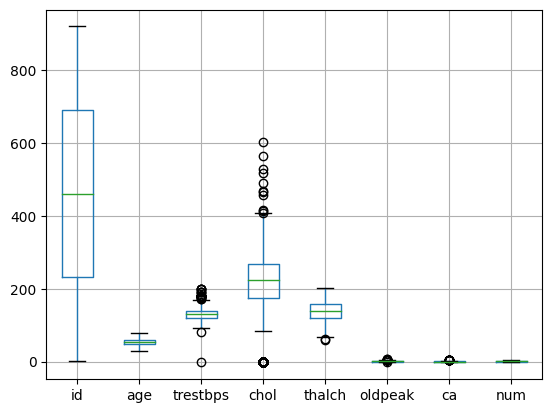

In [13]:
# 7. Five-number summary and box plot
print("\nFive-number summary:")
print(df[num_cols].describe())
df[num_cols].boxplot()
plt.show()


In [15]:

# 8. Display the outlier values using Z-score
z_scores = np.abs(zscore(df[num_cols], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
print("\nOutliers (Z-score > 3):\n", df[outliers])


Outliers (Z-score > 3):
       id  age     sex        dataset               cp  trestbps   chol    fbs  \
91    92   62  Female      Cleveland     asymptomatic     160.0  164.0  False   
123  124   55    Male      Cleveland     asymptomatic     140.0  217.0  False   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
152  153   67  Female      Cleveland      non-anginal     115.0  564.0  False   
183  184   59    Male      Cleveland   typical angina     178.0  270.0  False   
188  189   54    Male      Cleveland  atypical angina     192.0  283.0  False   
191  192   51    Male      Cleveland     asymptomatic     140.0  298.0  False   
285  286   58    Male      Cleveland     asymptomatic     114.0  318.0  False   
338  339   39    Male        Hungary  atypical angina     190.0  241.0  False   
546  547   54    Male        Hungary     asymptomatic     130.0  603.0   True   
548  549   54    Male        Hungary     asymptomatic     200.0  198.0  False   
58

In [16]:
# 9. Correlation analysis
corr = df[num_cols].corr()
print("\nHighly positive correlations:\n", corr[corr > 0.5])
print("\nHighly negative correlations:\n", corr[corr < -0.5])
print("\nNo correlation:\n", corr[(corr < 0.2) & (corr > -0.2)])


Highly positive correlations:
            id  age  trestbps  chol  thalch  oldpeak        ca       num
id        1.0  NaN       NaN   NaN     NaN      NaN       NaN       NaN
age       NaN  1.0       NaN   NaN     NaN      NaN       NaN       NaN
trestbps  NaN  NaN       1.0   NaN     NaN      NaN       NaN       NaN
chol      NaN  NaN       NaN   1.0     NaN      NaN       NaN       NaN
thalch    NaN  NaN       NaN   NaN     1.0      NaN       NaN       NaN
oldpeak   NaN  NaN       NaN   NaN     NaN      1.0       NaN       NaN
ca        NaN  NaN       NaN   NaN     NaN      NaN  1.000000  0.516216
num       NaN  NaN       NaN   NaN     NaN      NaN  0.516216  1.000000

Highly negative correlations:
           id  age  trestbps  chol  thalch  oldpeak  ca  num
id       NaN  NaN       NaN   NaN     NaN      NaN NaN  NaN
age      NaN  NaN       NaN   NaN     NaN      NaN NaN  NaN
trestbps NaN  NaN       NaN   NaN     NaN      NaN NaN  NaN
chol     NaN  NaN       NaN   NaN     NaN      N


Features with right skew: ['oldpeak', 'ca', 'num']
Features with left skew: ['chol']
Features with no skew: ['id', 'age', 'trestbps', 'thalch']


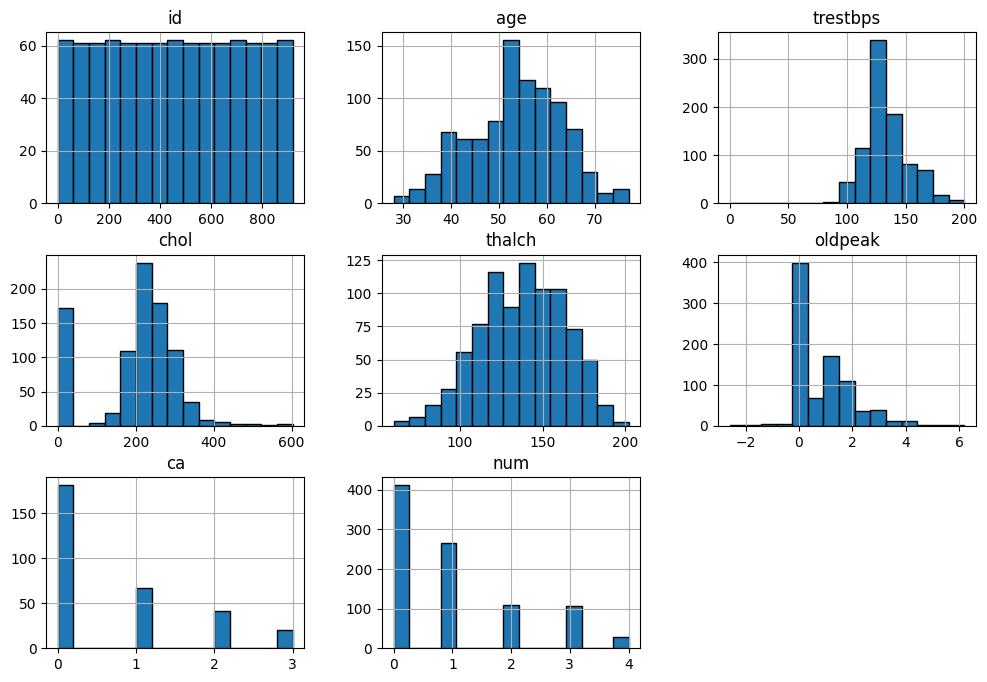

In [17]:
# 10. Skewness analysis with histogram
skewness = df[num_cols].skew()
print("\nFeatures with right skew:", skewness[skewness > 0.5].index.tolist())
print("Features with left skew:", skewness[skewness < -0.5].index.tolist())
print("Features with no skew:", skewness[(skewness >= -0.5) & (skewness <= 0.5)].index.tolist())
df[num_cols].hist(bins=15, edgecolor='black', figsize=(12, 8))
plt.show()

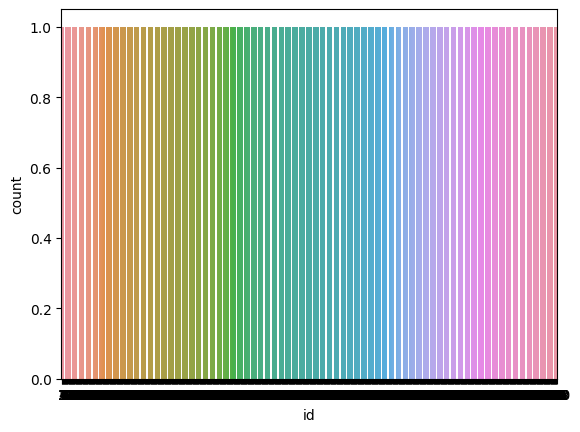

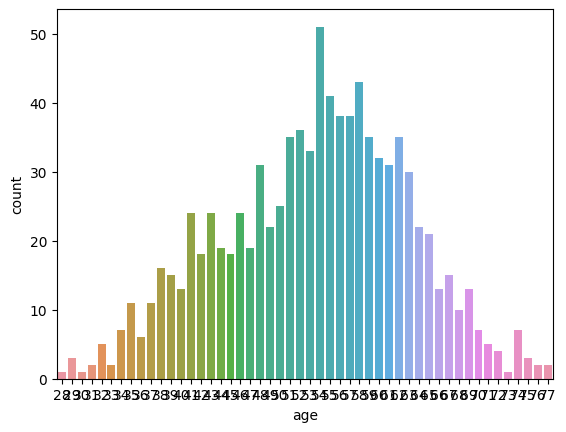

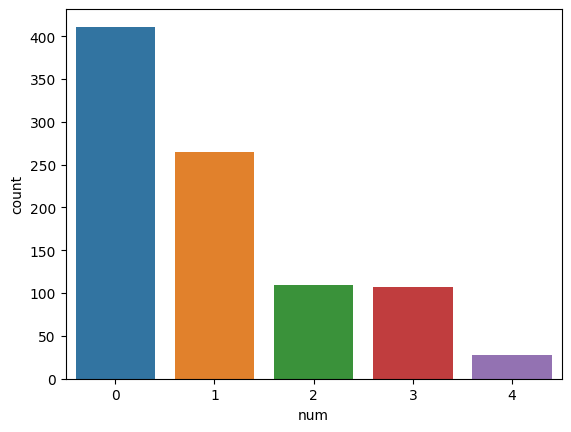

In [18]:
# 11. Univariate analysis for categorical variables
for col in df.select_dtypes(include='int64').columns:
    sns.countplot(data=df, x=col)
    plt.show()


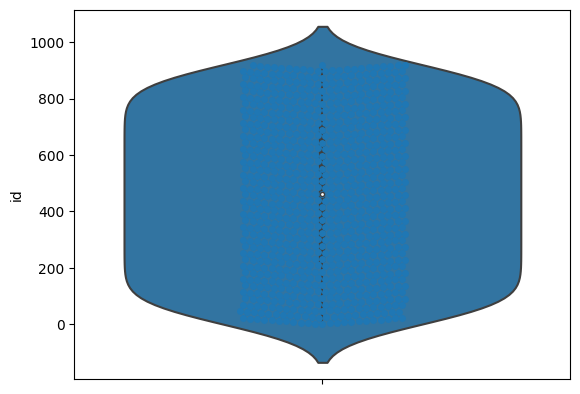

c:\Users\bharath kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


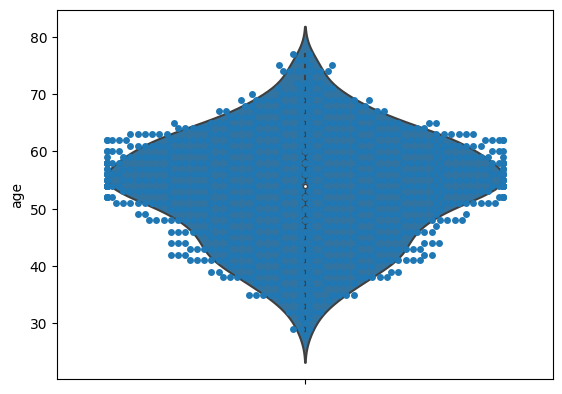

c:\Users\bharath kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


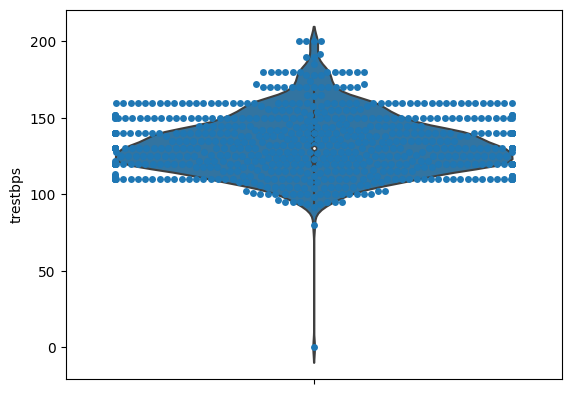

c:\Users\bharath kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


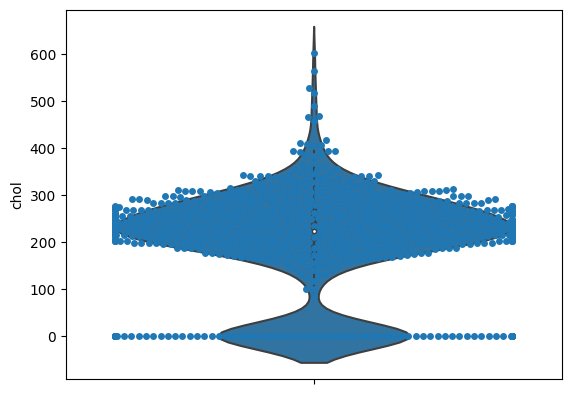

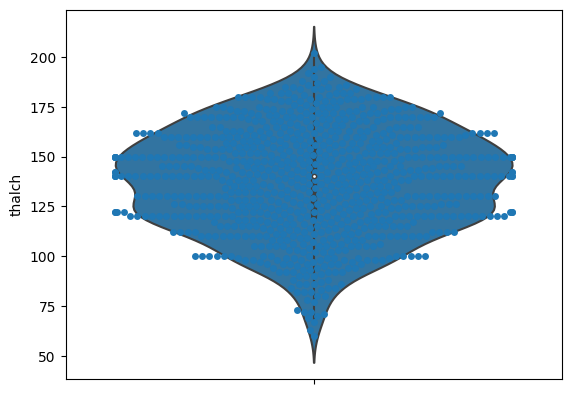

c:\Users\bharath kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


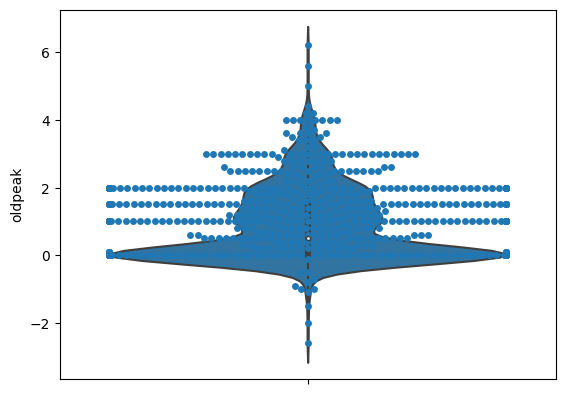

c:\Users\bharath kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


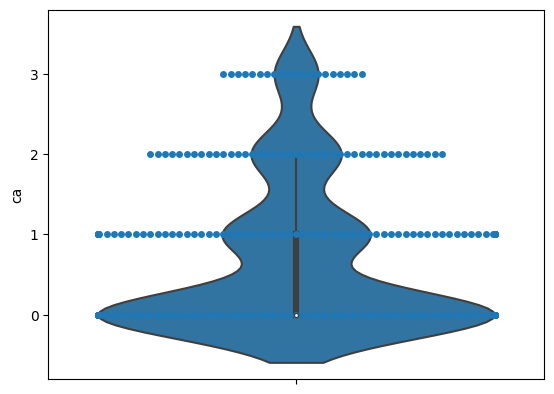

c:\Users\bharath kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


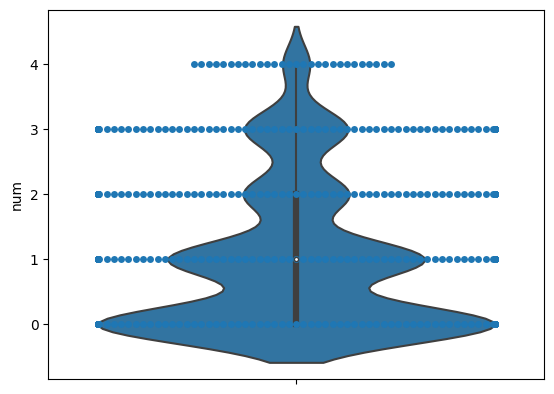

In [19]:
# 12. Univariate analysis for continuous variables
for col in num_cols:
    sns.swarmplot(data=df, y=col)
    sns.violinplot(data=df, y=col)
    plt.show()

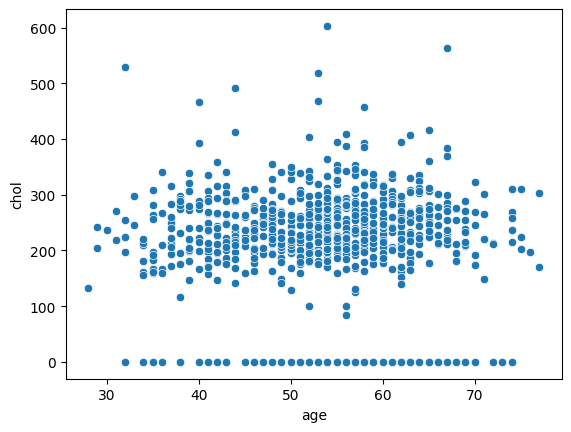

In [20]:
# 13. Scatter plot for two continuous variables
sns.scatterplot(data=df, x='age', y='chol')
plt.show()

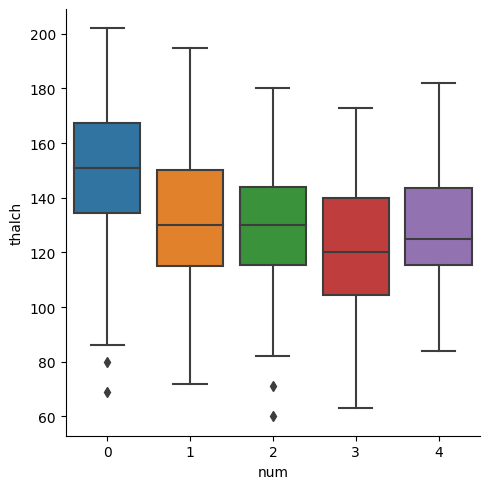

In [24]:
# 14. Bivariate analysis (continuous vs. categorical)
sns.catplot(data=df, x='num', y='thalch', kind="box")
plt.show()

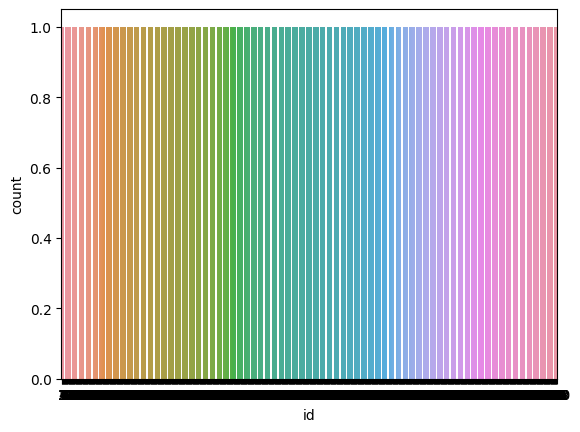

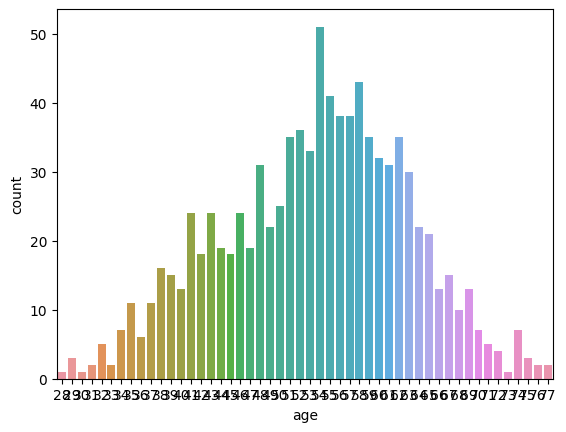

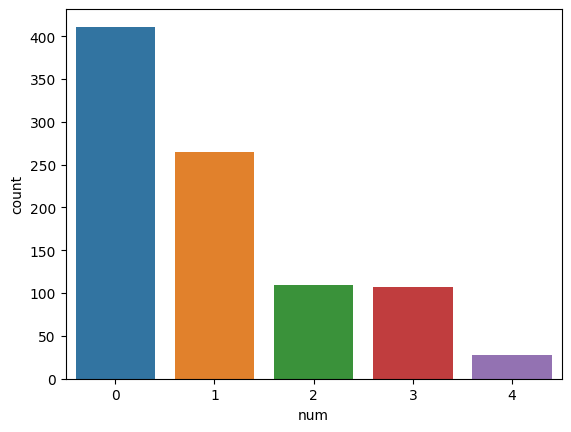

In [22]:
# 15. Count plot for categorical variables
for col in df.select_dtypes(include='int64').columns:
    sns.countplot(data=df, x=col)
    plt.show()

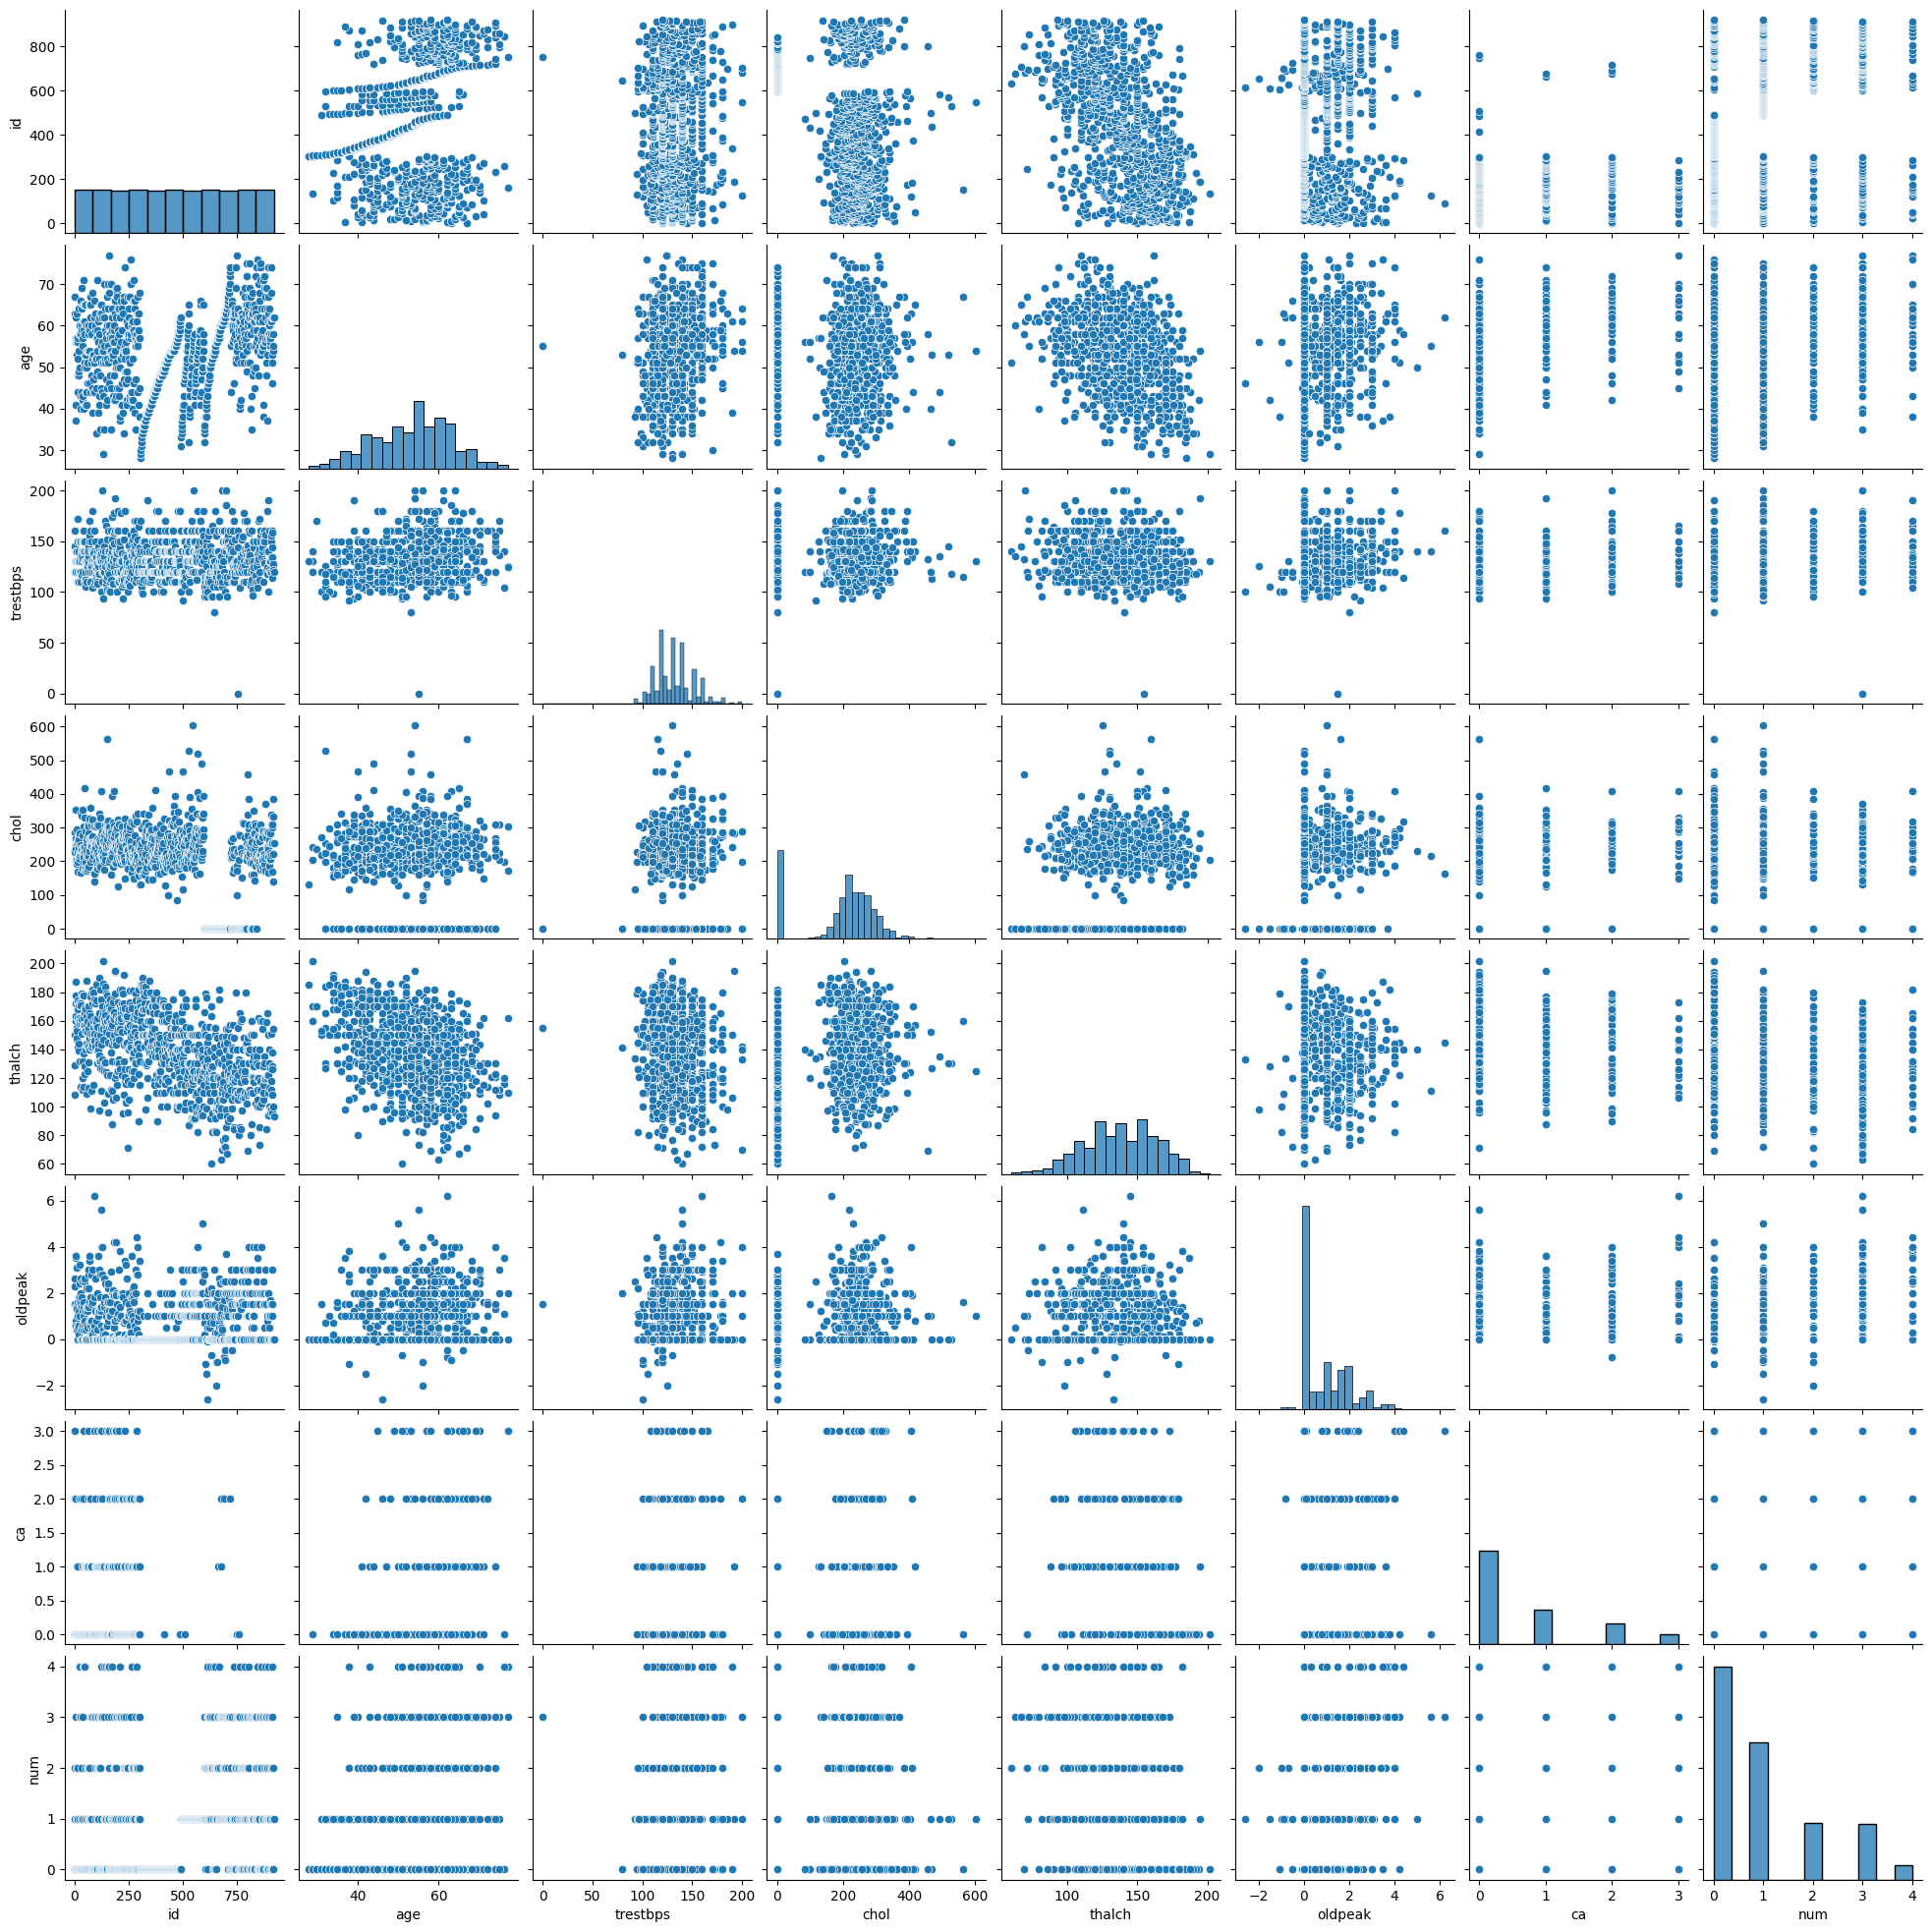

In [23]:
# 16. Multivariate analysis with pair plot
sns.pairplot(df[num_cols])
plt.show()